In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import scipy.stats
import numpy as np
import math
import seaborn as sns
import sklearn
from sklearn import datasets
%matplotlib inline

$\xi_{i}$ время меж- ду 𝑖-м моментом выходом из строя сервера и (𝑖+1)-м. 
Предполагается, что величины $\xi_{i}$ независимы в совокупности и имеют экспоненциальное распределение с парамет- ром $\lambda$ Т.е. $\xi_{i} \sim exp(\lambda)$

In [10]:
lambda_exp = 0.213
t_0 = 1
t = 60

Обозначим $𝑁_{t}$ — количество серверов, которые вышли из строя к моменту времени 𝑡 (в начальный момент времени $N_{0}$ = 0). В курсе случайных процессов будет доказано, что для любых 𝑠 < 𝑡 величина $N_{t} - N_{s} \sim Pois(\lambda(t − s))$ и независима с $N_{s}$. При этом $N_{t}$ как функция от 𝑡 будет называться пуассоновским процессом интенсивности 𝜆.

Нам нужно найти $E(N_{t} | N_{s})$ По линейности условного матожидания $E(N_{t} | N_{s})  = E(N_{t} - N_{s} | N_{s}) + E(N_{s} | N_{s})$ Далее, т.к. $N_{t} - N_{s} \perp\!\!\!\perp N_{s}$ и т.к. $N_{s} $измерима относительно сигма алгебры порожденной $N_{s}$ , то наше условное матожидание равно E = $E(N_{t} - N_{s}) + N_{t}$
По условию сказано, что $N_{t} - N_{s}$ из пуассоновского распределения с параметром $(λ(t−s))$ А мы знаем, что у этой случайной величины E($N_{t} - N_{s}$) = $\lambda \cdot (t - s)$
### Итого, наше условное матожидание равно E = $\lambda \cdot (t - s) + N_{s}$ 

In [11]:
break_time = pd.read_csv('/Users/semenfedotov/Desktop/MathStats/6.1.txt')

In [12]:
break_time = np.asarray(break_time['0.213'])

In [13]:
break_time

array([  5.473,   5.878,  13.314,  16.023,  17.636,  21.098,  24.429,
        26.512,  26.941,  27.613,  28.751,  37.977,  42.647,  55.828,
        59.729])

In [15]:
def conditional_expectation(t, s, lambda_parameter = lambda_exp) :
    if s > 59.729 :
        return lambda_parameter * (t - s) + len(break_time)
    return lambda_parameter * (t - s) + np.where(break_time >= s)[0][0]

In [16]:
times = range(t_0, t + 1)

In [17]:
print 'time\t E'
for time in times : 
    print ' ', time, '\t', conditional_expectation(t, time)

time	 E
  1 	12.567
  2 	12.354
  3 	12.141
  4 	11.928
  5 	11.715
  6 	13.502
  7 	13.289
  8 	13.076
  9 	12.863
  10 	12.65
  11 	12.437
  12 	12.224
  13 	12.011
  14 	12.798
  15 	12.585
  16 	12.372
  17 	13.159
  18 	13.946
  19 	13.733
  20 	13.52
  21 	13.307
  22 	14.094
  23 	13.881
  24 	13.668
  25 	14.455
  26 	14.242
  27 	16.029
  28 	16.816
  29 	17.603
  30 	17.39
  31 	17.177
  32 	16.964
  33 	16.751
  34 	16.538
  35 	16.325
  36 	16.112
  37 	15.899
  38 	16.686
  39 	16.473
  40 	16.26
  41 	16.047
  42 	15.834
  43 	16.621
  44 	16.408
  45 	16.195
  46 	15.982
  47 	15.769
  48 	15.556
  49 	15.343
  50 	15.13
  51 	14.917
  52 	14.704
  53 	14.491
  54 	14.278
  55 	14.065
  56 	14.852
  57 	14.639
  58 	14.426
  59 	14.213
  60 	15.0


Построим для наглядности график

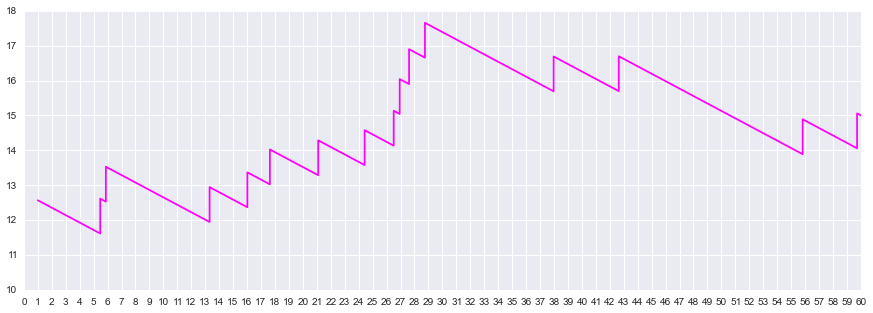

In [27]:
plt.figure(figsize=(15, 5))

plt.plot(super_time, [conditional_expectation(t, timka) for timka in super_time], color = 'magenta')
plt.xticks(np.arange(0, 61, 1))
plt.yticks(np.arange(10, 19, 1))
plt.show()